This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit here.


This dataset was collected in real-time using multiple Traffic APIs. It contains accident data collected from February 2016 to March 2023 for the Contiguous United States.

**Description for Each and Every Columns**:
*This Data comprises of 46 columns and 7,728,394 rows*

**ID**: This is a unique identifier of the accident record.

**Source**: Source of raw accident data

**Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

**Start_Time**: Shows start time of the accident in local time zone.

**End_Time**: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

**Start_Lat**: Shows latitude in GPS coordinate of the start point.

**Start_Lng**: Shows longitude in GPS coordinate of the start point.

**End_Lat**: Shows latitude in GPS coordinate of the end point.

**End_Lng**: Shows longitude in GPS coordinate of the end point.

**Distance(mi)**: The length of the road extent affected by the accident in miles.

**Description**: Shows a human provided description of the accident.

**Street**: Shows the street name in address field.

**City**: Shows the city in address field.

**County**: Shows the county in address field.

**State**: Shows the state in address field.

**Zipcode**: Shows the zipcode in address field.

**Country**: Shows the country in address field.

**Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

**Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

**Temperature(F)**: Shows the temperature (in Fahrenheit).

**Wind_Chill(F):** Shows the wind chill (in Fahrenheit).

**Humidity(%)**: Shows the humidity (in percentage).

**Pressure(in)**: Shows the air pressure (in inches).

**Visibility(mi)**: Shows visibility (in miles).

**Wind_Direction**: Shows wind direction.

**Wind_Speed(mph)**: Shows wind speed (in miles per hour).

**Precipitation(in)**: Shows precipitation amount in inches, if there is any.

**Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

**Amenity**: A POI annotation which indicates presence of amenity in a nearby location.

**Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

**Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

**Give_Way**: A POI annotation which indicates presence of give_way in a nearby location.

**Junction**: A POI annotation which indicates presence of junction in a nearby location.

**No_Exit**: A POI annotation which indicates presence of no_exit in a nearby location.

**Railway**: A POI annotation which indicates presence of railway in a nearby location.

**Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

**Station**: A POI annotation which indicates presence of station in a nearby location.

**Stop**: A POI annotation which indicates presence of stop in a nearby location.

**Traffic_Calming**: A POI annotation which indicates presence of traffic_calming in a nearby location.

**Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

**Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

**Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

**Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

**Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Definir la ruta a la carpeta Data
Data_path = '../Data'

# Cargar los datos
file_path = os.path.join(Data_path, 'US_Accidents_March23.csv')
df = pd.read_csv(file_path)

# Mostrar las primeras filas de la muestra
print("Primeras filas del conjunto de datos):")
print(df.head(5))

Primeras filas del conjunto de datos):
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   

In [3]:
# Tomar una muestra aleatoria del 10% de los datos
df = df.sample(frac=0.1, random_state=42)  # random_state asegura reproducibilidad


#### Data cleaning

In [4]:
# cantidad de duplicados
print('Cantidad de duplicado: ',df.duplicated().sum())

# cantidad de nulos
print('Cantidad de nulos:\n', df.isnull().sum())

Cantidad de duplicado:  0
Cantidad de nulos:
 ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  340548
End_Lng                  340548
Distance(mi)                  0
Description                   1
Street                     1088
City                         28
County                        0
State                         0
Zipcode                     180
Country                       0
Timezone                    757
Airport_Code               2226
Weather_Timestamp         12037
Temperature(F)            16385
Wind_Chill(F)            200024
Humidity(%)               17400
Pressure(in)              14092
Visibility(mi)            17673
Wind_Direction            17603
Wind_Speed(mph)           57485
Precipitation(in)        220612
Weather_Condition         17301
Amenity                   

Para imputar valores nulos en este conjunto de datos de accidentes, es importante seleccionar técnicas de imputación que respeten la naturaleza de cada variable y que mantengan la integridad y coherencia de los datos, estrategia de imputación personalizada para cada tipo de variable en función de su significado y distribución:

- Variables Geográficas (End_Lat, End_Lng): Usa el valor de inicio de la ubicación (Start_Lat y Start_Lng) si el punto final está ausente. Esto tiene sentido en trayectos cortos donde el accidente podría ser reportado solo en un punto.

- Variables Meteorológicas Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in): Usar la media o la mediana de la temperatura/humedad/presión/visibilidad en ese mes y ubicación geográfica (State, City)

- Variables de Texto/Categóricas: Description, Street, City, Zipcode, Timezone, Airport_Code Weather_Condition: 
    - Para campos de dirección (Street, City, Zipcode),  utiliza el valor más frecuente de un grupo de la misma área (State, County).
    - Para Weather_Condition, utiliza el valor más frecuente de la misma ubicación y temporada.

- Variables Binarias (POI Annotations) Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop: 
    - Asume que los valores NaN en estas variables indican que el elemento no estaba presente y reemplázalos con False.

- Variables de Periodo de Día Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight: Si hay valores faltantes, asume que el valor puede estar determinado por la hora (Start_Time) y ubicación   (State y City). Utiliza el valor más frecuente para esa hora en el grupo.



In [5]:
# Limpia los nanosegundos (hasta nueve ceros) si existen en los registros
df['Start_Time'] = df['Start_Time'].str.replace(r'\.0{6,9}', '', regex=True)
# Convertir Start_Time a datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Para revisar si hay valores NaT (no válidos) después de la conversión
invalid_dates = df[df['Start_Time'].isna()]
invalid_dates

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [6]:
# Variables Geográficas (End_Lat, End_Lng)
df['End_Lat'].fillna(df['Start_Lat'], inplace=True)
df['End_Lng'].fillna(df['Start_Lng'], inplace=True)

# Variables Meteorológicas Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in)
weather_columns = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]
df[weather_columns] = df.groupby(['State', 'City'])[weather_columns].transform(lambda x: x.fillna(x.median()))

# Variables de Texto/Categóricas: Description, Street, City, Zipcode, Timezone, Airport_Code, Weather_Condition
df['Street'].fillna(df.groupby(['State', 'County'])['Street'].transform(lambda x: x.mode()[0]), inplace=True)
df['City'].fillna(df.groupby(['State', 'County'])['City'].transform(lambda x: x.mode()[0]), inplace=True)
df['Zipcode'].fillna(df.groupby(['State', 'County'])['Zipcode'].transform(lambda x: x.mode()[0]), inplace=True)
df['Weather_Condition'].fillna(df.groupby(['State', 'City'])['Weather_Condition'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
df['Timezone'].fillna(df.groupby('State')['Timezone'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
df['Airport_Code'].fillna('Unknown', inplace=True)


# Variables Binarias (POI Annotations) Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop
poi_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]
df[poi_columns] = df[poi_columns].fillna(False)


# Variables de Periodo de Día Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight
twilight_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in twilight_columns:
    df[col].fillna(df.groupby([df['Start_Time'].dt.hour, 'State', 'City'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'), inplace=True)


# Weather_Timestamp: Utiliza Start_Time si Weather_Timestamp no está disponible, ya que el tiempo del accidente puede coincidir o estar cerca del registro de condiciones meteorológicas.
df['Weather_Timestamp'].fillna(df['Start_Time'], inplace=True)

####################### Estrategias de Imputación Adicionales ####################
### imputar por valor promedio global dado que no percisiten nulos.
df['Description'].fillna('No Description', inplace=True)

weather_columns = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)'
]
for col in weather_columns:
    if df[col].isnull().any():
        # Si es una columna numérica, se rellena con la media global
        if df[col].dtype != 'object':
            df[col].fillna(df[col].mean(), inplace=True)
        # Si es una columna categórica (Wind_Direction), se rellena con la moda global
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


# cantidad de nulos despues de imputar
print('Cantidad de nulos despues de imputar:\n', df.isnull().sum())

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24968\922646456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['End_Lat'].fillna(df['Start_Lat'], inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24968\922646456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Cantidad de nulos despues de imputar:
 ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway         

In [7]:
## Outliers

def identify_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

def count_outliers_iqr(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Contar los outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
    return outliers_count

def plot_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

def remove_outliers(df, outliers_dict):
    for col, outliers in outliers_dict.items():
        df = df.drop(outliers.index)
    return df

def cap_outliers(df, columns, method='iqr'):
    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        elif method == 'std':
            mean = df[col].mean()
            std_dev = df[col].std()
            lower_bound = mean - 3 * std_dev
            upper_bound = mean + 3 * std_dev
        
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df


In [8]:
# Obtener las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Contar outliers en cada columna numérica
outliers_count = count_outliers_iqr(df, numeric_columns)

# Mostrar los resultados
print("Cantidad de outliers por columna:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")


Cantidad de outliers por columna:
Severity: 157589
Start_Lat: 0
Start_Lng: 0
End_Lat: 0
End_Lng: 0
Distance(mi): 96649
Temperature(F): 6584
Wind_Chill(F): 10629
Humidity(%): 0
Pressure(in): 46295
Visibility(mi): 152874
Wind_Speed(mph): 23196
Precipitation(in): 69363


In [9]:
numeric_columns = [
    'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]
# Identificar outliers utilizando IQR
outliers_dict = identify_outliers_iqr(df, numeric_columns)
# Corrección de outliers mediante capping (cap and floor)
df = cap_outliers(df, numeric_columns, method='iqr')

### Ingeniería de características

La ingeniería de características es un paso fundamental en el proceso de análisis de datos y aprendizaje automático, en el que transformamos los datos sin procesar en características significativas e informativas que pueden mejorar el rendimiento de los modelos predictivos. En el contexto del conjunto de datos de accidentes de EE. UU., una ingeniería de características eficaz puede mejorar significativamente nuestra comprensión de los patrones de accidentes, ayudarnos a crear modelos predictivos más precisos.

En esta sección, exploraremos varias técnicas y consideraciones para la ingeniería de características específicas del conjunto de datos de accidentes de EE. UU. Nuestro objetivo es derivar nuevas características o transformar las existentes que capturen los patrones, las relaciones y los factores subyacentes que influyen en los accidentes.

In [10]:
df2= df.copy()

#### clasificación por bins

La clasificación por bins es esencial en la ingeniería de características, ya que transforma datos continuos en categorías que simplifican el análisis, mejoran la interpretabilidad y potencian el rendimiento de los modelos, especialmente en contextos de datos complejos o no lineales.

In [11]:
# Seleccionar Columnas Categóricas
categorical_cols = df2.select_dtypes(include=['object'])
# Valores Únicos en Cada Columna Categórica
categorical_cols.nunique()

ID                       772839
Source                        3
End_Time                 758187
Description              597932
Street                   112940
City                      10272
County                     1672
State                        49
Zipcode                  178510
Country                       1
Timezone                      4
Airport_Code               1914
Weather_Timestamp        345643
Wind_Direction               24
Weather_Condition           116
Sunrise_Sunset                3
Civil_Twilight                3
Nautical_Twilight             3
Astronomical_Twilight         3
dtype: int64

Dado que muchas columnas categóricas tienen demasiados valores únicos, es necesario agruparlas para simplificar el análisis. Esto implica crear columnas adicionales o sobrescribir aquellas con más de 20 valores únicos. Solo se agruparán las variables categóricas que tengan una alta importancia como características en el modelo.

In [12]:
df2['Weather_Condition'].unique()

array(['Mostly Cloudy', 'Partly Cloudy', 'Cloudy', 'Fair',
       'Light Snow / Windy', 'Heavy T-Storm', 'Clear', 'Overcast',
       'Cloudy / Windy', 'Heavy Rain', 'Light Rain', 'Fog',
       'Scattered Clouds', 'Heavy T-Storm / Windy', 'Rain',
       'Thunder in the Vicinity', 'Haze', 'Light Snow', 'Patches of Fog',
       'Shallow Fog', 'N/A Precipitation', 'Snow', 'Light Drizzle',
       'Mostly Cloudy / Windy', 'Snow / Windy', 'Unknown', 'Fair / Windy',
       'Thunder', 'Heavy Thunderstorms and Rain', 'Smoke',
       'Light Rain with Thunder', 'Snow and Sleet',
       'Partly Cloudy / Windy', 'Wintry Mix', 'Heavy Snow',
       'Light Rain / Windy', 'T-Storm', 'Thunderstorm',
       'Light Freezing Drizzle', 'Drizzle', 'Haze / Windy',
       'Light Freezing Rain', 'Heavy Snow / Windy',
       'Light Thunderstorms and Rain', 'Showers in the Vicinity',
       'Heavy Rain / Windy', 'Light Freezing Rain / Windy',
       'Drizzle and Fog', 'Light Snow and Sleet', 'Mist',
       'Blowin

In [13]:
# Definición de los bins de condiciones meteorológicas
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

# Definición de la función de mapeo para categorizar las condiciones meteorológicas
def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other' 

# Aplicación de la función de mapeo a la columna 'Weather_Condition'
df2['Weather_Bin'] = df2['Weather_Condition'].apply(map_weather_to_bins)
df2['Weather_Bin']

7133276    Cloudy
5363845    Cloudy
155993     Cloudy
1861414    Cloudy
2021359     Clear
            ...  
6498097     Clear
4286057     Clear
1756824    Cloudy
3757340     Clear
1155065     Snowy
Name: Weather_Bin, Length: 772839, dtype: object

In [14]:
df2['Temperature_Category'] = pd.cut(df2['Temperature(F)'], bins=[-100, 50, 80, 200], labels=['Cold', 'Mild', 'Hot'])
df2['Humidity_Level'] = pd.cut(df2['Humidity(%)'], bins=[0, 30, 70, 100], labels=['Low', 'Moderate', 'High'])
df2['Pressure_Category'] = pd.cut(df2['Pressure(in)'], bins=[0, 29.5, 30.2, 100], labels=['Low', 'Normal', 'High'])
df2['Visibility_Category'] = pd.cut(df2['Visibility(mi)'], bins=[0, 1, 5, 100], labels=['Poor', 'Moderate', 'Clear'])

#### Agrupamiento de coordenadas geográficas

El agrupamiento de coordenadas geográficas (latitud y longitud) es una técnica de análisis que organiza puntos de datos según su proximidad espacial. Esta técnica permite descubrir patrones significativos en datos espaciales con muchos valores únicos, revelando perspectivas valiosas. Al agrupar ubicaciones con características similares, se facilita la extracción de información procesable a partir de datos geográficos.

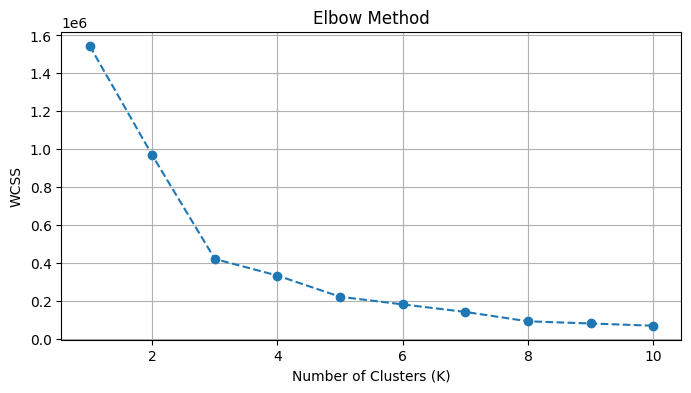

In [15]:
# Selección de características para clustering
X = df2[['Start_Lat', 'Start_Lng']]

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinación del número óptimo de clusters utilizando el Método del Codo (Elbow Method)
wcss = [] 
max_clusters = 10  
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Definir la ruta a la carpeta Results
results_path = '../Results'

# Visualización del Método del Codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_codo_Segmen_geo.png'))  # Guardar el gráfico
plt.show()


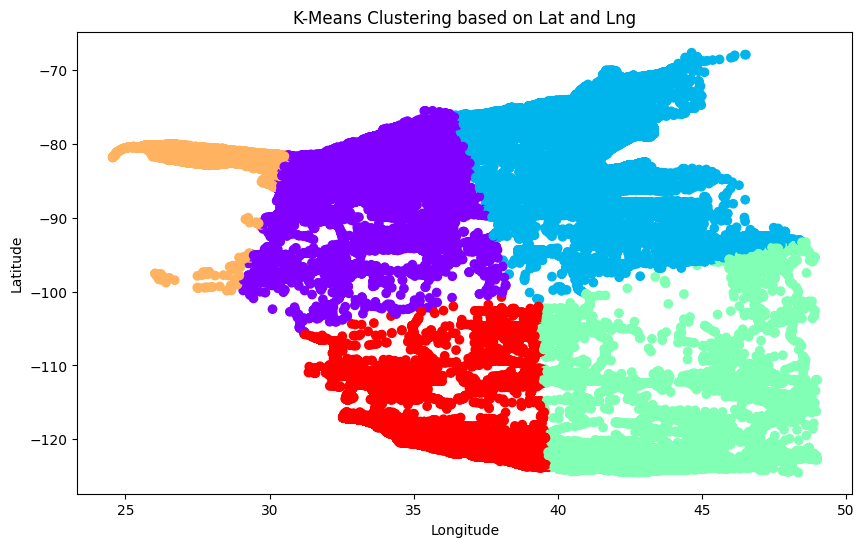

In [16]:
# Selección del número de clusters K
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Asignación de clusters al DataFrame original
df2['cluster_LatLng'] = clusters


# Visualización de los clusters en un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Start_Lat'], df2['Start_Lng'], c=df2['cluster_LatLng'], cmap='rainbow')
plt.title('K-Means Clustering based on Lat and Lng')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_Segmen_geo.png'))  # Guardar el gráfico
plt.show()

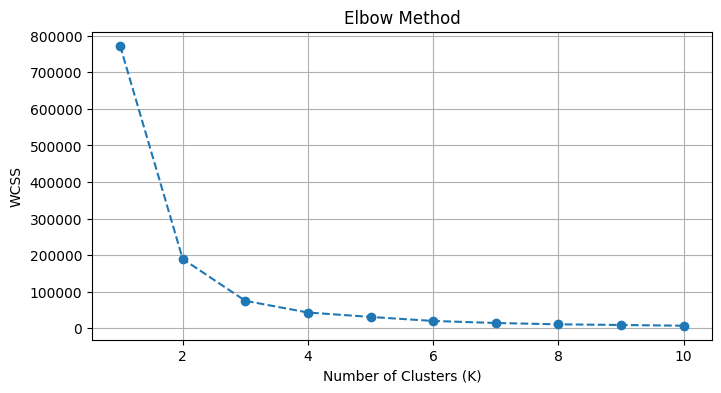

In [17]:
# Importar el codificador de etiquetas
label_encoder = LabelEncoder()
# Aplicar LabelEncoder a la columna 'Zipcode'
X = label_encoder.fit_transform(df2['Zipcode']).reshape(-1, 1)
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determinación del número óptimo de clusters usando el Método del Codo (Elbow Method)
wcss = [] 
max_clusters = 10  
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Visualización del Método del Codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_codo_Segmen_Zipcode.png'))  # Guardar el gráfico
plt.show()


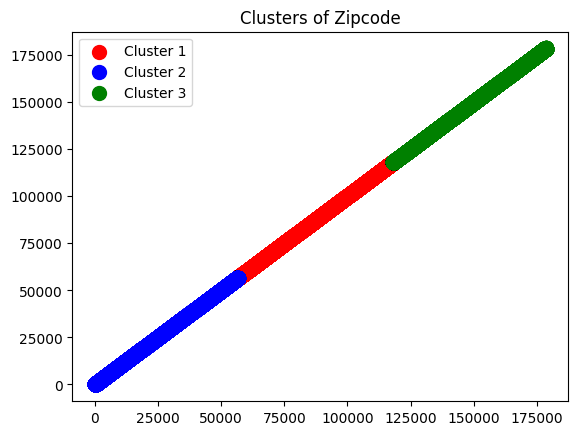

In [18]:
# Selección del número de clusters y entrenamiento final 
k=3
kmeans = KMeans(n_clusters=k, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)  # Predecimos los clusters para cada código postal escalado

# Asigna los cluster al dataset
df2['cluster_Zipcode'] = y_kmeans

# Visualización de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Zipcode')
plt.legend()
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_Segmen_Zipcode.png'))  # Guardar el gráfico
plt.show()

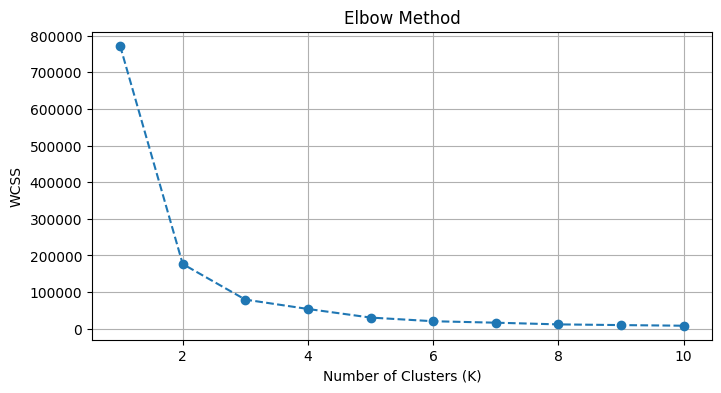

In [19]:
# Aplicar LabelEncoder a la columna 'Airport_Code'
X =label_encoder.fit_transform(df2['Airport_Code']).reshape(-1, 1)
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinación del número óptimo de clusters usando el Método del Codo (Elbow Method)
wcss = [] 
max_clusters = 10  
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualización del Método del Codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_codo_Segmen_Airport_Code.png'))  # Guardar el gráfico
plt.show()


d:\MIAD\despliegue de soluciones\Proyecto_Accidentes_Transito_EU\DSA_Proyecto_AccidentesTransito\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


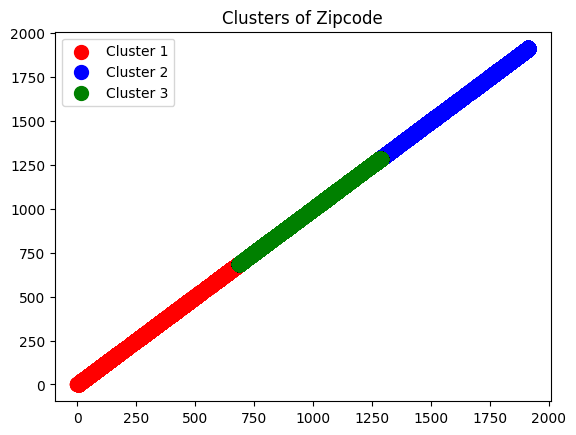

In [20]:
# Selección del número de clusters y entrenamiento final 
k=3
kmeans = KMeans(n_clusters=k, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Asigna los cluster al dataset
df2['cluster_Airport_Code'] = y_kmeans

# Visualización de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Zipcode')
plt.legend()
plt.savefig(os.path.join(results_path, 'Ingeniería_característica_Segmen_Airport_Code.png'))  # Guardar el gráfico
plt.show()

In [21]:
# Limpia los nanosegundos (hasta nueve ceros) si existen en los registros
df2['End_Time'] = df2['End_Time'].str.replace(r'\.0{6,9}', '', regex=True)
# Convertir End_Date a datetime si no está en ese formato
df2['End_Time'] = pd.to_datetime(df2['End_Time'], errors='coerce')

# duracion del accidente segundos
df2['Accident_Duration'] = (df2['End_Time'] - df2['Start_Time']).dt.total_seconds() / 60.0

#### Conversión de fecha
Extraer características de datos de fecha y hora es fundamental para preparar datos temporales en análisis y modelado. Simplifica la complejidad de DateTime, mejora la interpretación y permite a los modelos captar patrones significativos.

In [22]:
# obtener fecha y hora para Start_Time
df2['Start_Date'] = df2['Start_Time'].dt.date
df2['Start_Time'] = df2['Start_Time'].dt.time
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'], format="%Y-%m-%d")

# Limpia los nanosegundos (hasta nueve ceros) si existen en los registros
df2['Weather_Timestamp'] = df2['Weather_Timestamp'].str.replace(r'\.0{6,9}', '', regex=True)
# Convertir Weather_Timestamp a datetime si no está en ese formato
df2['Weather_Timestamp'] = pd.to_datetime(df2['Weather_Timestamp'], errors='coerce')
# obtener fecha y hora para Weather_Timestamp
df2['Weather_Date'] = df2['Weather_Timestamp'].dt.date
df2['Weather_Time'] = df2['Weather_Timestamp'].dt.time
df2['Weather_Date'] = pd.to_datetime(df2['Start_Date'], format="%Y-%m-%d")


# obtener fecha y hora para End_Date
df2['End_Date'] = df2['End_Time'].dt.date
df2['End_Time'] = df2['End_Time'].dt.time
df2['End_Date'] = pd.to_datetime(df2['Start_Date'], format="%Y-%m-%d")


In [23]:
df2['Start_month'] = df2['Start_Date'].dt.month
df2['Start_day'] = df2['Start_Date'].dt.day
df2['Start_year'] = df2['Start_Date'].dt.year

df2['End_month'] = df2['End_Date'].dt.month
df2['End_day'] = df2['End_Date'].dt.day
df2['End_year'] = df2['End_Date'].dt.year

df2['Weather_month'] = df2['Weather_Date'].dt.month
df2['Weather_day'] = df2['Weather_Date'].dt.day
df2['Weather_year'] = df2['Weather_Date'].dt.year


parts = df2['Start_Time'].astype(str).str.split(':')
df2['Start_Hour'] = parts.str[0]
df2['Start_Mins'] = parts.str[1]
df2['Start_seconds'] = parts.str[2]

parts = df2['End_Time'].astype(str).str.split(':')
df2['End_Hour'] = parts.str[0]
df2['End_Mins'] = parts.str[1]
df2['End_seconds'] = parts.str[2]

parts = df2['Weather_Time'].astype(str).str.split(':')
df2['Weather_Hour'] = parts.str[0]
df2['Weather_Mins'] = parts.str[1]
df2['Weather_seconds'] = parts.str[2]

df2[['Start_month','Start_day','Start_year']].head()
#df2[['Start_Hour','Start_Mins','Start_seconds']].head()

,Start_month,Start_day,Start_year
7133276,4,17,2020
5363845,4,21,2022
155993,8,12,2016
1861414,9,20,2019
2021359,6,3,2019


#### Nuevas características
La creación de nuevas características es fundamental para extraer información relevante y facilitar que los modelos capturen patrones complejos, lo que resulta en predicciones precisas

In [ ]:
df2['Comfort_Index'] = (df2['Temperature(F)'] - 32) * (df2['Humidity(%)'] / 100)

# identifica si es diciembre
def is_diciembre(start_time):
    try:
        return start_time.month == 12
    except ValueError:
        print("error")
        return False

df2['is_diciembre'] = df2['Start_Date'].apply(lambda x: 'Yes' if is_diciembre(x) else 'No')


# identifica si es hora pico
def categorize_rush_hour(start_time):
    parts = start_time.split(':')
    hour = parts[0]
    
    try:        
        if 6 <= int(hour) < 10:  # Morning rush hour from 6 AM to 10 AM
            return 'Yes'
        elif 16 <= int(hour) < 19:  # Evening rush hour from 4 PM to 7 PM
            return 'Yes'
        else:
            return 'No'
    except ValueError:
        return 'Invalid'

df2['Is_Rush_Hour'] = df2['Start_Hour'].apply(categorize_rush_hour)


# Calcular la frecuencia de accidentes por calle y añadirla como una nueva columna
street_accident_counts = df2['Street'].value_counts()
df2['Street_Accident_Frequency'] = df2['Street'].map(street_accident_counts)

df2.head(5)

In [91]:
# Target Encoding: Promedio de Severidad por Ciudad
# Calcula el promedio de severidad para cada ciudad y lo asigna como un nuevo valor de 'City'
city_severity_mean = df2.groupby('City')['Severity'].mean()
df2['City_Target_Encoded'] = df2['City'].map(city_severity_mean)

# Count Encoding: Frecuencia de Accidentes por Ciudad
# Calcula la frecuencia de accidentes por ciudad y la asigna como un nuevo valor de 'City'
city_accident_count = df2['City'].value_counts()
df2['City_Count_Encoded'] = df2['City'].map(city_accident_count)

df2.head(5)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,End_seconds,Weather_Hour,Weather_Mins,Weather_seconds,Comfort_Index,is_diciembre,Is_Rush_Hour,Street_Accident_Frequency,City_Target_Encoded,City_Count_Encoded
7133276,A-7182628,Source1,1,09:29:30,10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,30,09,24,00,37.26,No,Yes,5,2.286496,1096
5363845,A-5404588,Source1,2,10:01:00,11:44:08,38.781024,-121.265820,38.780377,-121.265815,0.045,...,08,09,55,00,20.24,No,No,3,2.298725,549
155993,A-156000,Source3,3,16:45:00,17:15:00,33.985249,-84.269348,33.985249,-84.269348,0.000,...,00,16,53,00,27.73,No,Yes,1,2.131579,152
1861414,A-1871277,Source2,3,15:22:16,15:56:00,47.118706,-122.556908,47.118706,-122.556908,0.000,...,00,14,58,00,29.40,No,No,5168,2.447561,820
2021359,A-2031222,Source2,2,16:55:43,18:12:09,33.451355,-111.890343,33.451355,-111.890343,0.000,...,09,16,51,00,10.08,No,Yes,14,2.090647,695


#### Eliminación de columnas innecesarias
- Eliminar columnas innecesarias en un conjunto de datos es una práctica clave para:
- Reducir la dimensionalidad: Esto evita la sobrecarga computacional y el riesgo de que el modelo aprenda ruido en lugar de patrones significativos.
- Reducir el ruido: Al eliminar características irrelevantes o ruidosas, se mejora la relación señal-ruido, favoreciendo la capacidad de generalización del modelo.
- Simplificar e interpretar: Modelos más simples son más fáciles de entender y mantienen, facilitando la identificación de factores clave.
- Acelerar el procesamiento: Menos características reducen los recursos y tiempo requeridos para el entrenamiento e inferencia.

Las siguientes columnas se eliminarán del conjunto de datos por no aportar información útil al modelo:
- ID, Source
- Start_Lat, Start_Lng, End_Lat, End_Lng: Coordenadas geográficas específicas.
- Street
- City, County, Zipcode, Country, Airport_Code
- Weather_Timestamp, Start_Date, Weather_Date, End_Date
- Description
- Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight


In [ ]:
# Lista de columnas de componentes de tiempo que deben ser numéricas
time_columns = [
    'Start_Hour', 'Start_Mins', 'Start_seconds', 
    'End_Hour', 'End_Mins', 'End_seconds', 
    'Weather_Hour', 'Weather_Mins', 'Weather_seconds'
]

for col in time_columns:
    # Convertir valores no convertibles a NaN y luego a 0
    df2[col] = pd.to_numeric(df2[col], errors='coerce').fillna(0).astype(int)


In [109]:
# cantidad de nulos
print('Cantidad de nulos:\n', df2.isnull().sum())

Cantidad de nulos:
 Severity                     0
Distance(mi)                 0
State                        0
Temperature(F)               0
Wind_Chill(F)                0
                            ..
is_diciembre                 0
Is_Rush_Hour                 0
Street_Accident_Frequency    0
City_Target_Encoded          0
City_Count_Encoded           0
Length: 61, dtype: int64


In [ ]:
exclude_columns = [
    'ID', 'Source' ,'Start_Time', 'End_Time',  'Start_Lat','Start_Lng', 'End_Lat', 'End_Lng',
    'Description','Street', 'City', 'County','Zipcode', 'Country','Timezone',
    'Airport_Code', 'Weather_Timestamp','Weather_Condition', 'Weather_Time',
    'Start_Date', 'Weather_Date', 'End_Date'
]

#Excluir las columnas irrelevantes
df2 = df2.drop(columns=exclude_columns)


In [93]:
df2.head(5)

,Severity,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,End_seconds,Weather_Hour,Weather_Mins,Weather_seconds,Comfort_Index,is_diciembre,Is_Rush_Hour,Street_Accident_Frequency,City_Target_Encoded,City_Count_Encoded
7133276,1,0.000,FL,78.0,78.0,81.0,30.13,10.0,ESE,13.0,...,30,09,24,00,37.26,No,Yes,5,2.286496,1096
5363845,2,0.045,CA,55.0,55.0,88.0,29.83,10.0,SSE,9.0,...,08,09,55,00,20.24,No,No,3,2.298725,549
155993,3,0.000,GA,91.0,60.0,47.0,29.91,10.0,South,10.4,...,00,16,53,00,27.73,No,Yes,1,2.131579,152
1861414,3,0.000,WA,67.0,67.0,84.0,29.78,10.0,WNW,3.0,...,00,14,58,00,29.40,No,No,5168,2.447561,820
2021359,2,0.000,AZ,95.0,95.0,16.0,28.53,10.0,WSW,6.0,...,09,16,51,00,10.08,No,Yes,14,2.090647,695


In [94]:
# Definir la ruta a la carpeta Data
Data_path = '../Data'

# Cargar los datos
file_path = os.path.join(Data_path, 'US_Accidents_March23_v2.csv')

df2.to_csv(file_path, index=False)


#### Label Encoding
La codificación de etiquetas transforma datos categóricos en un formato numérico que facilita su uso en algoritmos de aprendizaje automático, simplifica el manejo de datos, preserva el orden en datos ordinales y puede mejorar el rendimiento en ciertas situaciones.

In [ ]:
# Identificar columnas booleanas, categóricas y de tipo 'object'
boolean_columns = df2.select_dtypes(include=['bool']).columns
# Seleccionar las columnas categóricas en el DataFrame
categorical_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

In [137]:
# 1. Convertir variables booleanas a 0 y 1
df2[boolean_columns] = df2[boolean_columns].astype(int)

# 3. Aplicar One-Hot Encoding a columnas categóricas que no fueron procesadas con Label Encoding
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

In [138]:
df2.head(5)

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Temperature_Category_Mild,Temperature_Category_Hot,Humidity_Level_Moderate,Humidity_Level_High,Pressure_Category_Normal,Pressure_Category_High,Visibility_Category_Moderate,Visibility_Category_Clear,is_diciembre_Yes,Is_Rush_Hour_Yes
7133276,1,0.000,78.0,78.0,81.0,30.13,10.0,13.0,0.0,0,...,True,False,False,True,True,False,False,True,False,True
5363845,2,0.045,55.0,55.0,88.0,29.83,10.0,9.0,0.0,0,...,True,False,False,True,True,False,False,True,False,False
155993,3,0.000,91.0,60.0,47.0,29.91,10.0,10.4,0.0,0,...,False,True,True,False,True,False,False,True,False,True
1861414,3,0.000,67.0,67.0,84.0,29.78,10.0,3.0,0.0,0,...,True,False,False,True,True,False,False,True,False,False
2021359,2,0.000,95.0,95.0,16.0,28.53,10.0,6.0,0.0,0,...,False,True,False,False,False,False,False,True,False,True


In [139]:
df2.shape

(772839, 145)

In [140]:
# Definir la ruta a la carpeta Data
Data_path = '../Data'

# Cargar los datos
file_path = os.path.join(Data_path, 'US_Accidents_March23_v2.csv')

df2.to_csv(file_path, index=False)